In [1]:
from torchvision.datasets import MNIST
import torchvision.transforms as tfs

In [2]:
data_tfs = tfs.Compose([tfs.ToTensor(), tfs.Normalize((0.5), (0.5))])

In [3]:
root = './'
train = MNIST(root, train=True, transform = data_tfs, download = True)
test = MNIST(root, train=False, transform = data_tfs, download = True)

In [4]:
len(train)

60000

In [5]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [6]:
train[0][0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [7]:
train[0][0].shape

torch.Size([1, 28, 28])

In [8]:
import torch
from torch.utils.data import DataLoader

In [9]:
batch_size = 128

train_loader = DataLoader(train, batch_size = batch_size, drop_last = True)
test_loader = DataLoader(test, batch_size = batch_size, drop_last = True)

In [10]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape


(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [11]:
# NN

features = 784
classes = 10

In [12]:
W = torch.FloatTensor(features, classes).uniform_(-1,1) / features**0.5
W.requires_grad_()

tensor([[ 0.0279, -0.0005, -0.0002,  ...,  0.0069, -0.0292, -0.0062],
        [-0.0288, -0.0346,  0.0242,  ...,  0.0065,  0.0274, -0.0159],
        [-0.0329,  0.0336, -0.0313,  ...,  0.0069,  0.0010,  0.0214],
        ...,
        [-0.0269, -0.0294, -0.0145,  ...,  0.0034,  0.0164, -0.0027],
        [ 0.0080, -0.0186, -0.0024,  ...,  0.0226, -0.0294, -0.0251],
        [-0.0311, -0.0265,  0.0161,  ...,  0.0283, -0.0137, -0.0175]],
       requires_grad=True)

In [13]:
# SGD

epochs = 3
lr = 1e-2
history = []



In [14]:
import numpy as np
from torch.nn.functional import cross_entropy

In [16]:
for i in range(epochs):
    for x_batch, y_batch in train_loader:
        
        x_batch = x_batch.reshape(x_batch.shape[0],-1)
        
        logits = x_batch@ W
        probabilities = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdims=True)
        
        loss = -torch.log(probabilities[range(batch_size), y_batch]).mean()
        
        history.append(loss.item())
        
        loss.backward()
        
        grad = W.grad
        with torch.no_grad():
            W -= lr*grad
            W.grad.zero_()

    print(f'{i+1}, \t loss: {history[-1]}')

1, 	 loss: 0.10756973922252655
2, 	 loss: 0.10055750608444214
3, 	 loss: 0.09559519588947296


In [17]:
import matplotlib.pyplot as plt

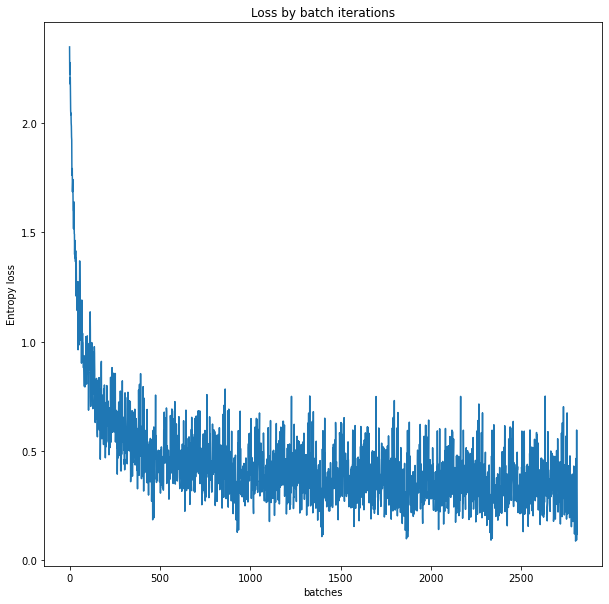

In [19]:
plt.figure(figsize=(10,10))
plt.plot(history)

plt.title('Loss by batch iterations')
plt.xlabel('batches')
plt.ylabel('Entropy loss')

plt.show()

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
    batches += 1
    x_batch = x_batch.view(x_batch.shape[0],-1)
    y_batch = y_batch
    
    preds = torch.argmax(x_batch @ W, dim =1)
    acc += (preds == y_batch).cpu().numpy().mean()
    
print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.909


In [25]:
# simple NN with pytorch modules

import torch.nn as nn
!pip install torchsummary
from torchsummary import summary

In [29]:
model = nn.Sequential(
    nn.Linear(features, 64),
    nn.ReLU(),
    nn.Linear(64, classes))

model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=10, bias=True)
)